In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing the required libraries

In [6]:
import os
from PIL import Image
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import KFold
from keras import layers
from keras.models import Sequential

##Defining paths to gather dataset

In [7]:
# Define paths to train and test folders
train_folder = "/content/drive/MyDrive/data/train"
test_folder = "/content/drive/MyDrive/data/test"

In [8]:
# Function to load images and labels
def load_data(folder_path):
    images = []
    labels = []
    for fruit_class in os.listdir(folder_path):
        class_path = os.path.join(folder_path, fruit_class)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                  #Load image and resize to a common size
                  image = Image.open(image_path).resize((100,100))
                  images.append(np.array(image))
                  labels.append(fruit_class)
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")

    return np.array(images), np.array(labels)

##Preprocessing the images

In [9]:
# Load training and testing data
train_images, train_labels = load_data(train_folder)
test_images, test_labels = load_data(test_folder)

# Check if data is loaded correctly
#print(f"Loaded {len(train_images)} training images.")
#print(f"Loaded {len(test_images)} testing images.")

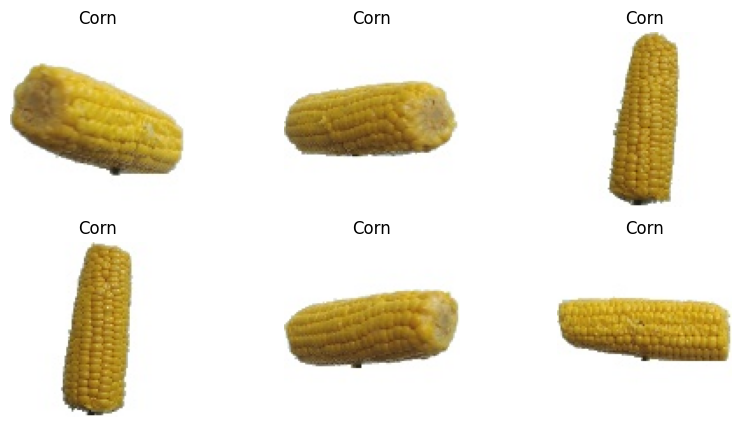

Train images shape: (6024, 100, 100, 3)
Train labels shape: (6024,)
Test images shape: (663, 100, 100, 3)
Test labels shape: (663,)


In [7]:
#Inspect the loaded data to understand
# Display some sample images and their labels
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_images[i])
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()

# Check the shape of the data
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

In [8]:
# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encode the labels
label_binarizer = LabelBinarizer()
train_labels_encoded = label_binarizer.fit_transform(train_labels)
test_labels_encoded = label_binarizer.transform(test_labels)



# Get the number of classes
num_classes = len(label_binarizer.classes_)

# Convert to categorical format and remove extra dimension
# Convert to categorical format
train_labels_categorical = to_categorical(train_labels_encoded, num_classes=num_classes)
test_labels_categorical = to_categorical(test_labels_encoded, num_classes=num_classes)


#train_labels_categorical = to_categorical(train_labels_encoded, num_classes=num_classes).reshape(-1, num_classes)
#test_labels_categorical = to_categorical(test_labels_encoded, num_classes=num_classes).reshape(-1, num_classes)

# Check the one-hot encoded labels
print(f"One-hot encoded train labels:\n {train_labels_encoded[:5]}")
print(f"One-hot encoded test labels:\n {test_labels_encoded[:5]}")




One-hot encoded train labels:
 [[0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
One-hot encoded test labels:
 [[0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]]


In [9]:
print("Shape of train_labels_categorical:", train_labels_categorical.shape)
print("Shape of test_labels_categorical:", test_labels_categorical.shape)

Shape of train_labels_categorical: (6024, 14, 14)
Shape of test_labels_categorical: (663, 14, 14)


##Implementing the K-Fold Cross Validation

In [10]:
# Split the training data using K-Fold Cross Validation
from sklearn.model_selection import KFold

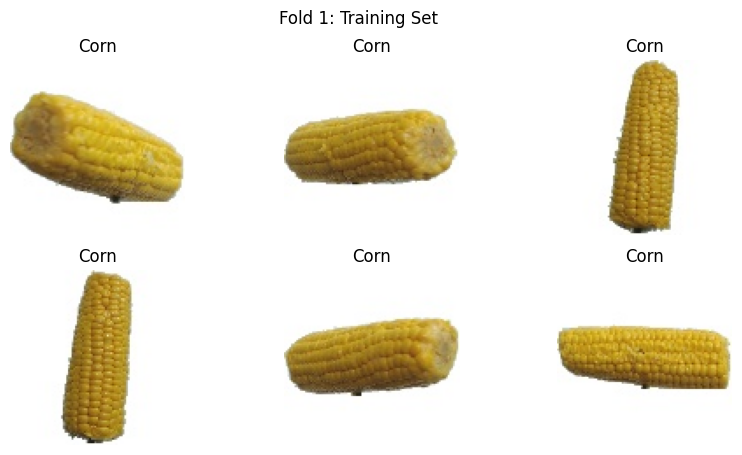

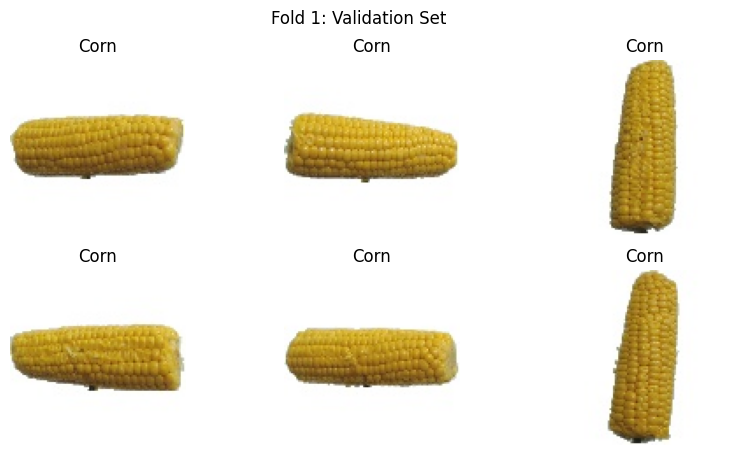

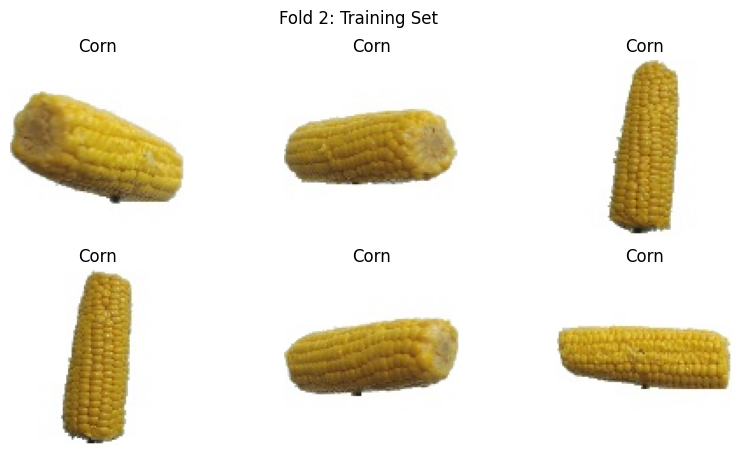

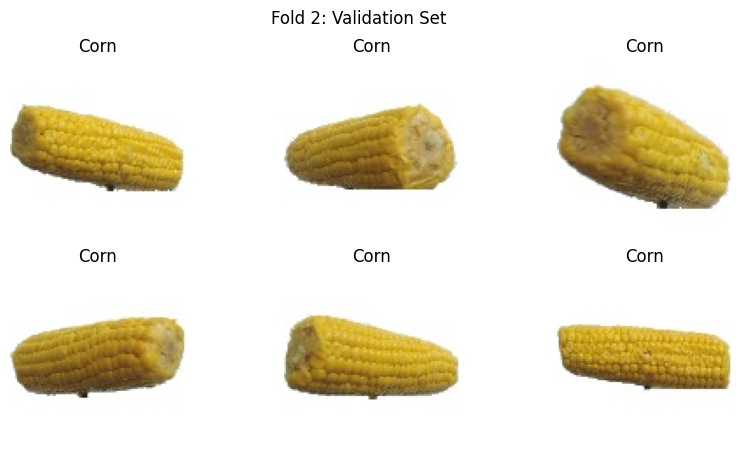

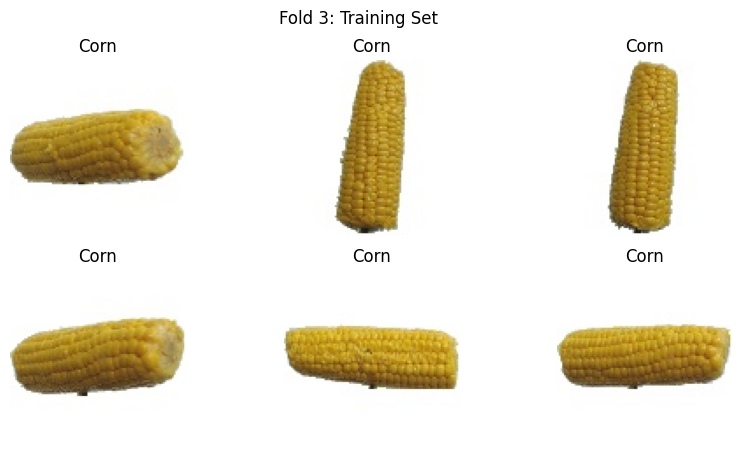

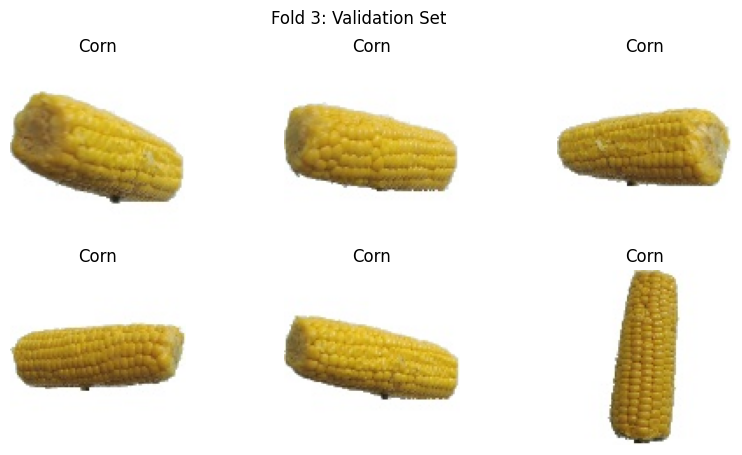

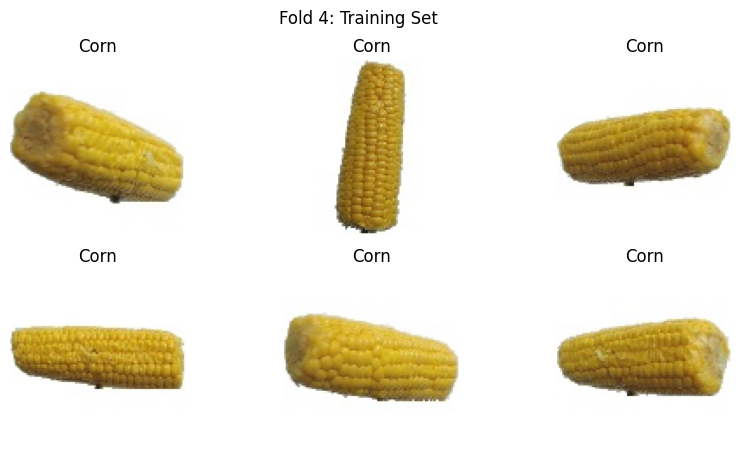

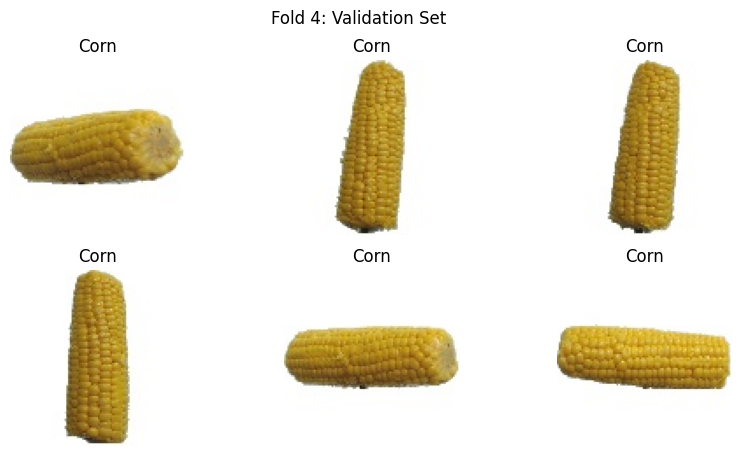

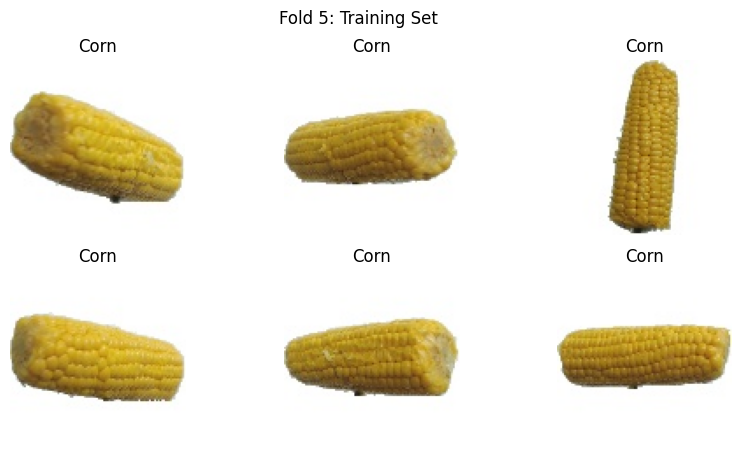

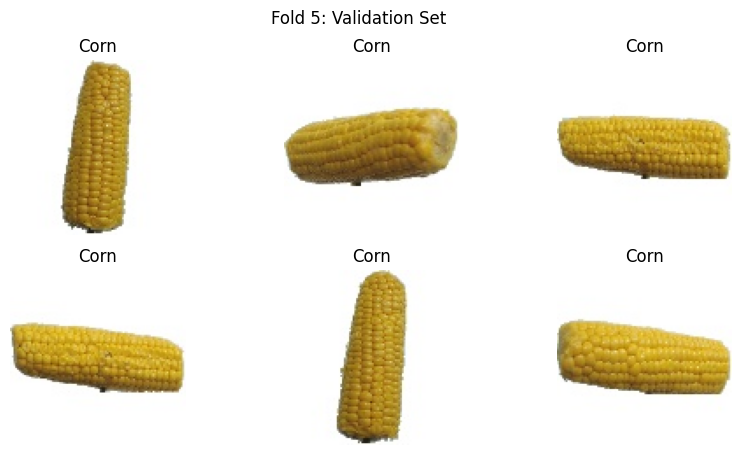

In [11]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_index, val_index) in enumerate(kfold.split(train_images)):
    train_images_fold, val_images_fold = train_images[train_index], train_images[val_index]
    train_labels_fold, val_labels_fold = train_labels[train_index], train_labels[val_index]

    # Display some sample images and their labels from the training set for the current fold
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(train_images_fold[i])
        plt.title(train_labels_fold[i])
        plt.axis('off')
    plt.suptitle(f"Fold {fold+1}: Training Set")
    plt.show()

    # Display some sample images and their labels from the validation set for the current fold
    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(val_images_fold[i])
        plt.title(val_labels_fold[i])
        plt.axis('off')
    plt.suptitle(f"Fold {fold+1}: Validation Set")
    plt.show()



#Define CNN Model

In [33]:
# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# Define a function to create the model
def create_model(num_classes):
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Recompile the model
def train_model(train_images, train_labels, val_images, val_labels, num_classes):
    # Create the model
    model = create_model(num_classes)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels,
                        epochs=10, batch_size=32,
                        validation_data=(val_images, val_labels))

    return model, history

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training labels
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Define the number of classes
num_classes = len(label_encoder.classes_)

# Initialize lists to store models and histories
models_list = []
histories_list = []

# Perform K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kfold.split(train_images)):
    train_images_fold, val_images_fold = train_images[train_index], train_images[val_index]
    train_labels_fold, val_labels_fold = train_labels_encoded[train_index], train_labels_encoded[val_index]

    # Print the size of the training labels
    print("Size of train_labels:", len(train_labels_fold))

    # Train the model for the current fold
    model, history = train_model(train_images_fold, to_categorical(train_labels_fold), val_images_fold, to_categorical(val_labels_fold), num_classes)

    # Save the trained model and its history
    models_list.append(model)
    histories_list.append(history)

    # Reshape the train labels array
    train_labels_fold_reshaped = train_labels_fold.reshape(-1, 1)

    try:
        # Encode the train labels using the label encoder
        train_labels_encoded = label_encoder.transform(train_labels_fold_reshaped)
    except ValueError as e:
        # Adjust label encoder to handle unseen labels
        print("Adjusting label encoder to handle unseen labels...")

        unseen_labels = set(train_labels_fold_reshaped.flatten()) - set(label_encoder.classes_)
        label_encoder.classes_ = np.concatenate((label_encoder.classes_, list(unseen_labels)))
        train_labels_encoded = label_encoder.transform(train_labels_fold_reshaped)

    # Convert the encoded labels to one-hot encoded format
    train_labels_categorical = to_categorical(train_labels_encoded, num_classes=num_classes)

    # Reshape validation labels to 1D array
    val_labels_fold_flat = val_labels_fold.ravel()

    # Transform the validation labels using the fitted label encoder
    val_labels_encoded = label_encoder.transform(val_labels_fold_flat)

    # Convert the encoded labels to one-hot encoded format
    val_labels_categorical = to_categorical(val_labels_encoded, num_classes=num_classes)

    # Save the trained model and its history
    models_list.append(model)
    histories_list.append(history)



Size of train_labels: 4819
Epoch 1/10
151/151 [==============================] - 90s 590ms/step - loss: 2.5601 - accuracy: 0.7607 - val_loss: 0.0350 - val_accuracy: 0.9867
Epoch 2/10
151/151 [==============================] - 92s 609ms/step - loss: 0.1542 - accuracy: 0.9494 - val_loss: 0.0100 - val_accuracy: 0.9975
Epoch 3/10
151/151 [==============================] - 92s 611ms/step - loss: 0.0955 - accuracy: 0.9693 - val_loss: 0.0038 - val_accuracy: 0.9975
Epoch 4/10
151/151 [==============================] - 93s 619ms/step - loss: 0.0656 - accuracy: 0.9813 - val_loss: 5.4760e-04 - val_accuracy: 1.0000
Epoch 5/10
151/151 [==============================] - 89s 590ms/step - loss: 0.0889 - accuracy: 0.9755 - val_loss: 7.0034e-04 - val_accuracy: 1.0000
Epoch 6/10
151/151 [==============================] - 87s 575ms/step - loss: 0.0559 - accuracy: 0.9846 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/10
151/151 [==============================] - 90s 595ms/step - loss: 0.0596 - accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


IndexError: index 21 is out of bounds for axis 1 with size 14

In [35]:
# Initialize lists to store evaluation results
test_loss_list = []
test_accuracy_list = []

# Iterate over trained models and evaluate on test data
for model in models_list:
    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(test_images, to_categorical(label_encoder.transform(test_labels), num_classes=num_classes))

    # Append results to lists
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_accuracy)

# Calculate average test loss and accuracy
avg_test_loss = np.mean(test_loss_list)
avg_test_accuracy = np.mean(test_accuracy_list)

# Print average test loss and accuracy
print("Average Test Loss:", avg_test_loss)
print("Average Test Accuracy:", avg_test_accuracy)


21/21 [==============================] - 3s 126ms/step - loss: 4.8827e-05 - accuracy: 1.0000
Average Test Loss: 4.8827081627678126e-05
Average Test Accuracy: 1.0


##Generating Confusion Matrix

21/21 [==============================] - 3s 132ms/step


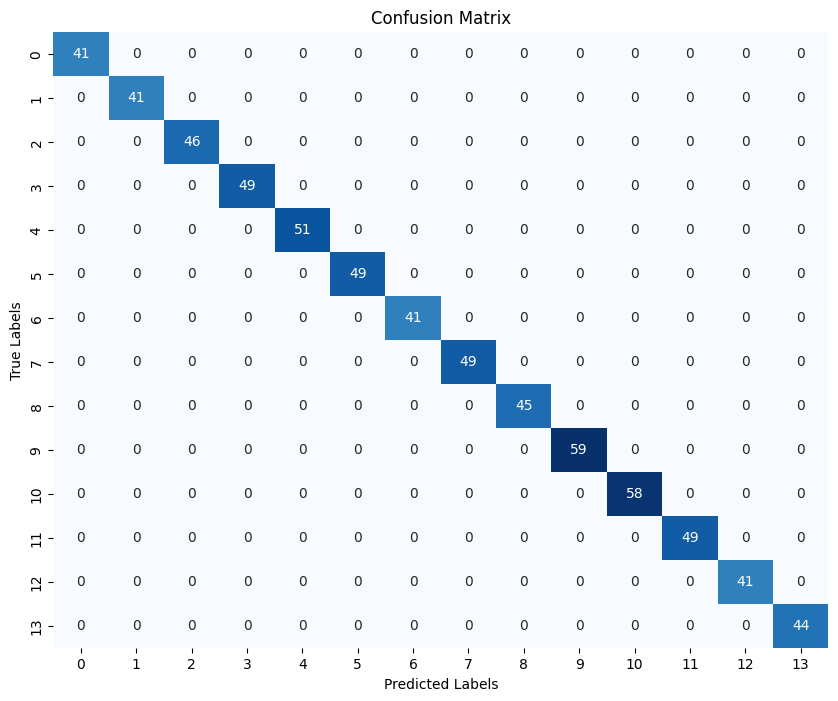

IndexError: index 14 is out of bounds for axis 0 with size 14

In [43]:
import numpy as np
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the label encoder has been fit on all the classes in the training set
label_encoder.fit(train_labels)

# Encode the test labels using the fitted label encoder
test_labels_encoded = label_encoder.transform(test_labels)

# Convert the encoded test labels to one-hot encoded format
test_labels_categorical = to_categorical(test_labels_encoded, num_classes=num_classes)

# Use the last trained model (you can select the best model based on validation accuracy if you have it)
best_model = models_list[-1]

# Predict the labels for the test set
y_pred = best_model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels_categorical, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Adjust label_encoder.classes_ to contain only classes present in training data
adjusted_classes = label_encoder.classes_[np.unique(train_labels_encoded)]

# Print classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=adjusted_classes))


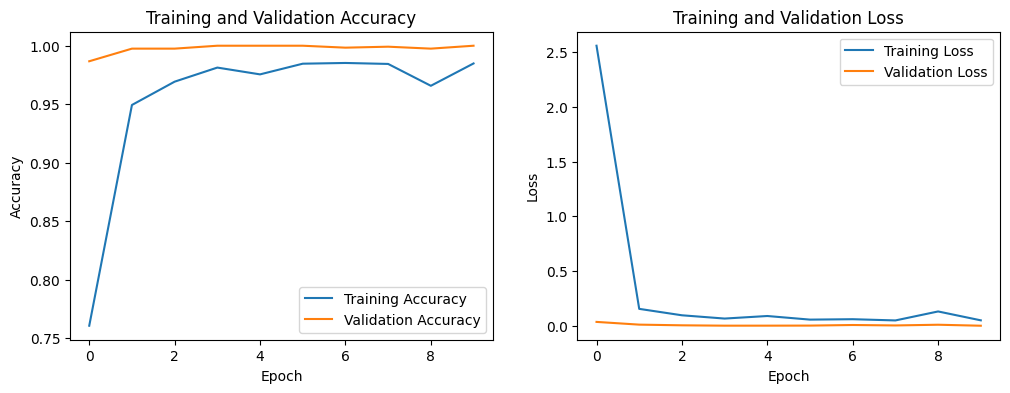

In [44]:
#Plotting the curves

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


##Tuning Two Hyper Parameter

In [45]:
#define range of parameter
filter_options = [32, 64]
dropout_options = [0.3, 0.5]


In [46]:
#Modify model creation function
def create_model(num_classes, num_filters, dropout_rate):
    model = Sequential([
        layers.Conv2D(num_filters, (3, 3), activation='relu', input_shape=(100, 100, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(num_filters * 2, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(num_filters * 4, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [49]:
#Verify Data Loading
def load_data(folder_path):
    images = []
    labels = []
    for fruit_class in os.listdir(folder_path):
        class_path = os.path.join(folder_path, fruit_class)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    image = Image.open(image_path).resize((100, 100))
                    images.append(np.array(image))
                    labels.append(fruit_class)
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")
    return np.array(images), np.array(labels)

# Load training data
train_images, train_labels = load_data(train_folder)

# Check lengths
print(f"Number of train images: {len(train_images)}")
print(f"Number of train labels: {len(train_labels)}")

# Ensure that the lengths match
assert len(train_images) == len(train_labels), "train_images and train_labels should have the same length"

# Encode the labels
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Define the number of classes
num_classes = len(label_encoder.classes_)


Number of train images: 6024
Number of train labels: 6024


In [ ]:
#Step 2: Re-Run Hyperparameter Tuning
def train_model_with_hyperparams(train_images, train_labels, num_classes, num_filters, dropout_rate, learning_rate=0.001):
    model = create_model(num_classes, num_filters, dropout_rate)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []

    for train_index, val_index in kfold.split(train_images):
        train_images_fold, val_images_fold = train_images[train_index], train_images[val_index]
        train_labels_fold, val_labels_fold = train_labels[train_index], train_labels[val_index]

        train_labels_fold_categorical = to_categorical(train_labels_fold, num_classes=num_classes)
        val_labels_fold_categorical = to_categorical(val_labels_fold, num_classes=num_classes)

        history = model.fit(train_images_fold, train_labels_fold_categorical,
                            epochs=10, batch_size=32,
                            validation_data=(val_images_fold, val_labels_fold_categorical),
                            verbose=0)

        fold_accuracies.append(history.history['val_accuracy'][-1])

    return np.mean(fold_accuracies)

filter_options = [32, 64]
dropout_options = [0.3, 0.5]

best_accuracy = 0
best_hyperparams = {}

for num_filters in filter_options:
    for dropout_rate in dropout_options:
        accuracy = train_model_with_hyperparams(train_images, train_labels_encoded, num_classes, num_filters, dropout_rate)
        print(f"Accuracy: {accuracy:.4f} - Filters: {num_filters}, Dropout: {dropout_rate}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparams = {'num_filters': num_filters, 'dropout_rate': dropout_rate}

print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Hyperparameters: {best_hyperparams}")
